# Probability and Random Variables
We have now established that *variance* is the key element of data that we wish to capture. The fact that measured values differ from datapoint-to-datapoint implies an inherent *randomess* and *uncertainty* to real-world data. As such, in order to say anything about the variance in our data, we need some means of formalising this randomness. This formalisation comes from the field of *probability*. 


`````{admonition} Key Concept
:class: tip
Unlike the common understanding of the term, *randomness* in probability does not mean completely unstructured and unpredictable. In everyday speech, when we say that something happened "randomly", that is often taken as meaning that it could not have been predicted. However, in the more formal world of probability, the term *random* has a very specific definition that means something that is unpredictable in the short term, but has a *predictable regularity* over the long term. This is captured within the concept of a *random variable*.
`````

## Random Variables
A *random variable* refers to any variable whos value changes with each measurement, but whos behaviour over time adheres to a known *probability distribution*. This is an important concept because every value that we measure as part of an experiment is concptualised as a realisation of a given random variable. For instance, we would treat *reaction time* as a random variable, with each measured value of reaction time representing a realistion of that random variable. Implicit in this is the idea that reaction time adheres to some probability distribution and that our experiment is simply the process of sampling value from that distribution.

In general, there are two different classes of random variable: *discrete* and *continuous*. This is an important distinction because one of the first things we need to do when analysing a dataset is determin which of the outcome variables are *discrete* and which are *continuous*, as this will then dictate the range of suitable models we can use. 

### Discrete Random Variables
The first class of random variables concern those where the number of possible outcomes is *finite*. For instance, tossing a coin and seeing whether the outcome is either heads or tails. Counting the face values of two dice would also be discrete, because there are only a limited number of outcomes. Indeed, counting anything would be considered discrete because there are only a finite number of possibilities, with no values in-between. In all these cases, we can consider the outcome of the experiment[^probexp] to be a random variable governed by some discrete probability distribution.

The textbook example of this is counting the number of heads after flipping a coin multiple times. For instance, if we flipped a coin 20 times then the probability of different numbers of *heads* can be described by the *binomial* distribution. If $y$ is the count of the number of *heads*, then $y$ is a random variable drawn from the binomial distribution, which we write as

$$
y \sim \mathcal{B}\left(n,p\right).
$$

The shape of the distribition is controlled by two *parameters*, $n$ and $p$. In this example, $n$ is the number of coin flips and $p$ is the probability of *heads* on a single flip. So, here $n = 20$ and (assuming the coin is fair) $p = 0.5$. Knowing these parameter values allows us to know everything we need to about the behaviour of $y$. 

`````{admonition} What is a Parameter?
:class: tip
A *parameter*, very generally, is simply a number, but one which has particular *importance* for understanding some system. In the context of probability distributions, the parameters are numbers that control the *shape* of the distribution. We typically conceptualise a probability distribution as representing some *population* where the parameters are constants that describe the behaviour of that population. As such, these are numbers that carry great importance for understanding the variable we are trying to capture. Make sure you have a clear handle on this, because the parameters are the *key focus* of statistical models.
`````



We can use `R` to simulate realisations of this random variable 

In [1]:
set.seed(666)
y <- rbinom(n=10, size=20, prob=0.5)
y

[1] 12  8 14  8  9 11 14 10  5  9

which we can think of 10 repeats of flipping a coin 20 times and counting the number of heads. The first time we do this, we get $\frac{12}{20}$ heads, the second time we get $\frac{8}{20}$ heads and so on. Notice that we have no real way of knowing what the next value will be and thus, in the short-term, the variable $y$ is unpredictable. However, in the long-term, we know how frequently certain values will appear and thus there is a much more general sense of predictability. 

We can visualise the complete distribution $\mathcal{B}\left(20,0.5\right)$ using the code below. You can play around with the values of `n` and `p` to see how the distribution changes shape.

In [2]:
options(repr.plot.width=14, repr.plot.height=8)

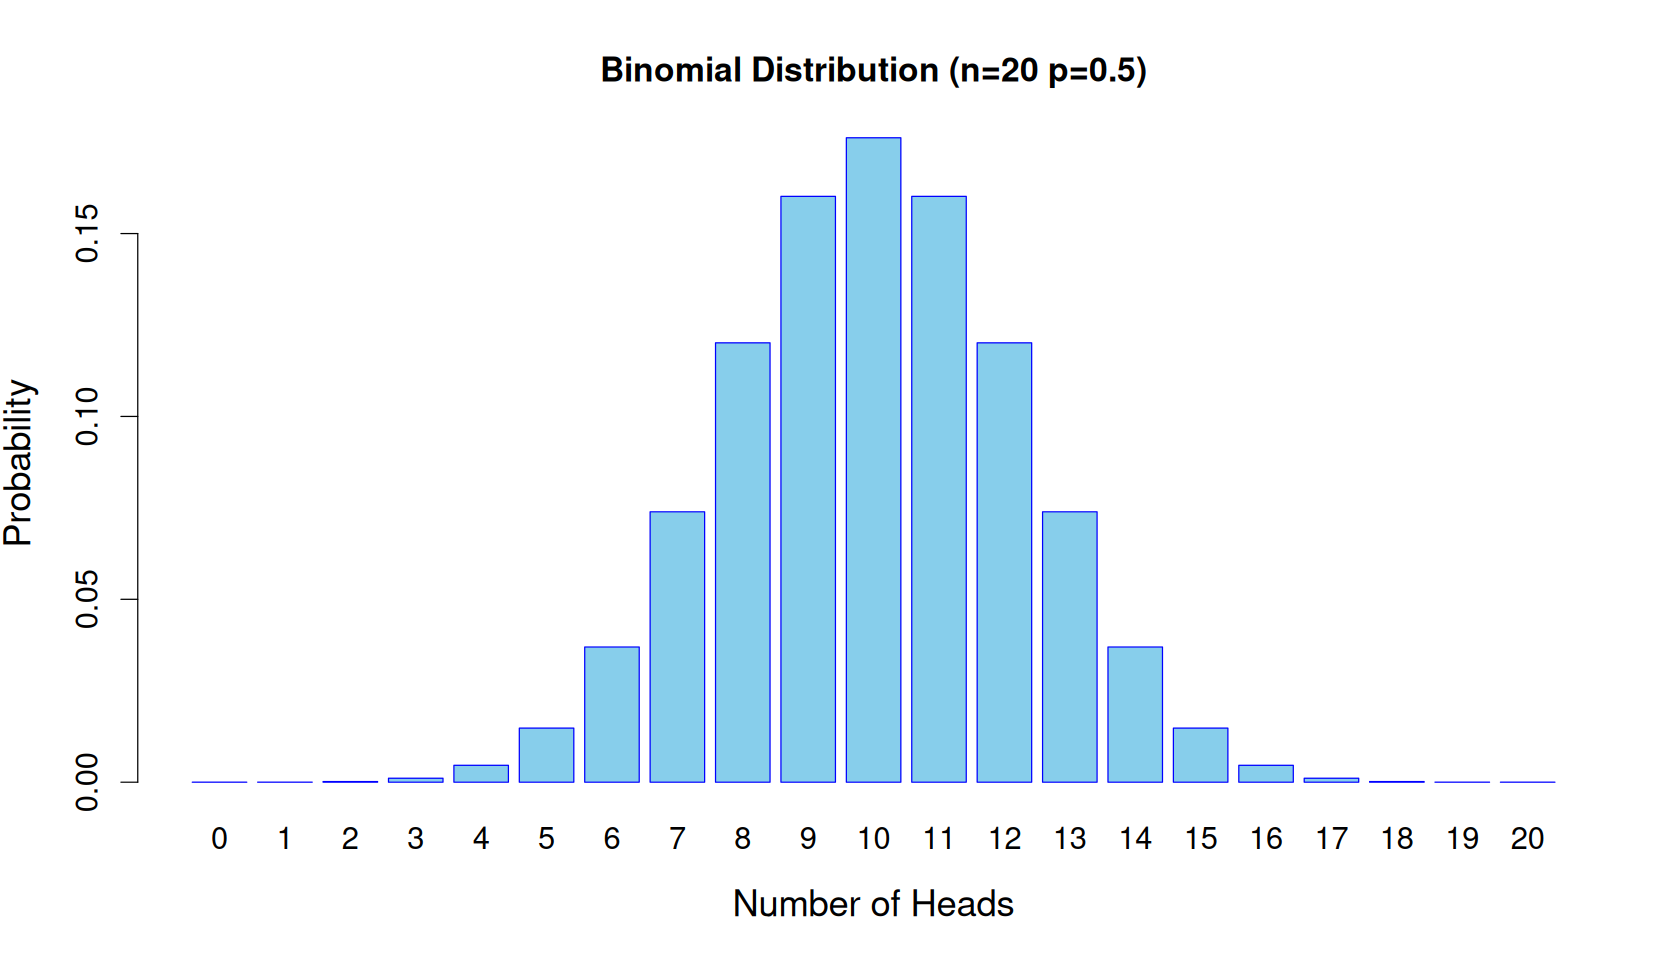

In [3]:
# Binomial probabilities
n <- 20
p <- 0.5
y <- dbinom(0:n, size=n, prob=p)

# Plot
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
barplot(y, names.arg=0:n, 
        main=paste0("Binomial Distribution (n=", n, " p=", p, ")"), 
        xlab="Number of Heads", ylab="Probability", col="skyblue", 
        border="blue")

Although experimental psychologists do not spend much time flipping coins, we need to think more generally about the utility of probability distributions. For instance, imagine an experiment where each subject completes a number of trials. After each trial, their response can be categorised in one of two ways. Over all the trials we sum the number of times their response is in one category rather than the other. In this example, the measurement could be considered a binomial random variable, with $n$ equal to the number of trials and $p$ unknown. The purpose of the experiment is then to estimate what $p$ might be and, potentially, how $p$ changes under different manipulations.

Other examples of discrete probability distributions include the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) and the [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution).

`````{admonition} Treating Discrete as Continuous
:class: important
In many real-world cases of discrete random variables, you may find them being treated as *continuous* for the purpose of statistical analysis. For instance, the binomial distribution shown above *could* be approximated by a normal distribution. Historically, psychologists do this frequently when dealing with discrete data, such as the scores from a questionnaire or counts of the number of items remembered after a memory test. An argument can be made that the underlying structure that we are measuring is continuous and thus a predicted questionnaire score of `5.324` or quoting `7.235` items remembered are meaningful representation of the *latent variable* that is being captured. However, in many cases, this is done simply because psychologists are not well-trained on how to deal with discrete outcomes and so often simply ignore the true nature of what they are measuring. To become a powerful data analyst, it is important that this sort of information is *not* ignored and that the data are treated appropriately.
`````

### Continuous Random Variables
The second class of random variables concern those where the number of possible values is *infinte*. This can either be within an *unbounded* range (so the values can span $-\infty$ to $\infty$), or within a *bounded* range (such as anything between 0 and 1).

In many real-world situations our measurements are continuous and so treating the outcomes of experiments as *continuous* random variables is common. Indeed, huge amount of statistical theory are exclusively dedicated to continuous random variables. As an example, measuring the *height* of females in the UK could be conceptualised as a random variable drawn from a *normal* distribution. If $y$ is the measurement of *height*, we would write

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right).
$$

Like the binomial distribution, the shape of the normal distribution is controlled by two parameters. The first is the *mean* (denoted $\mu$), which controls the value that the distribution is centred-on. The second is the *variance* (denoted $\sigma^{2}$), which controls the *width* of the distribution and thus how much values drawn from the distribution will differ from the mean. 

For the example of *height*, we could set $\mu = 162$ and $\sigma^{2} = 6^{2} = 36$, both measured in centimetres. We could then use `R` to simulate realisations of this random variable using the `rnorm` function[^rnorm]

In [4]:
y <- rnorm(n=10, mean=162, sd=sqrt(36))
y

[1] 166.5504 154.1629 157.1849 151.2466 161.7478 174.9003 151.3786 167.1879
 [9] 151.6791 162.8048

which we can think of as measuring the height of 10 random females in the UK. We can also visualise the distribution $\mathcal{N}\left(162,36\right)$ using the code below. Again, you can play around with the values of `mean` and `sd` to see how the distribution changes shape.

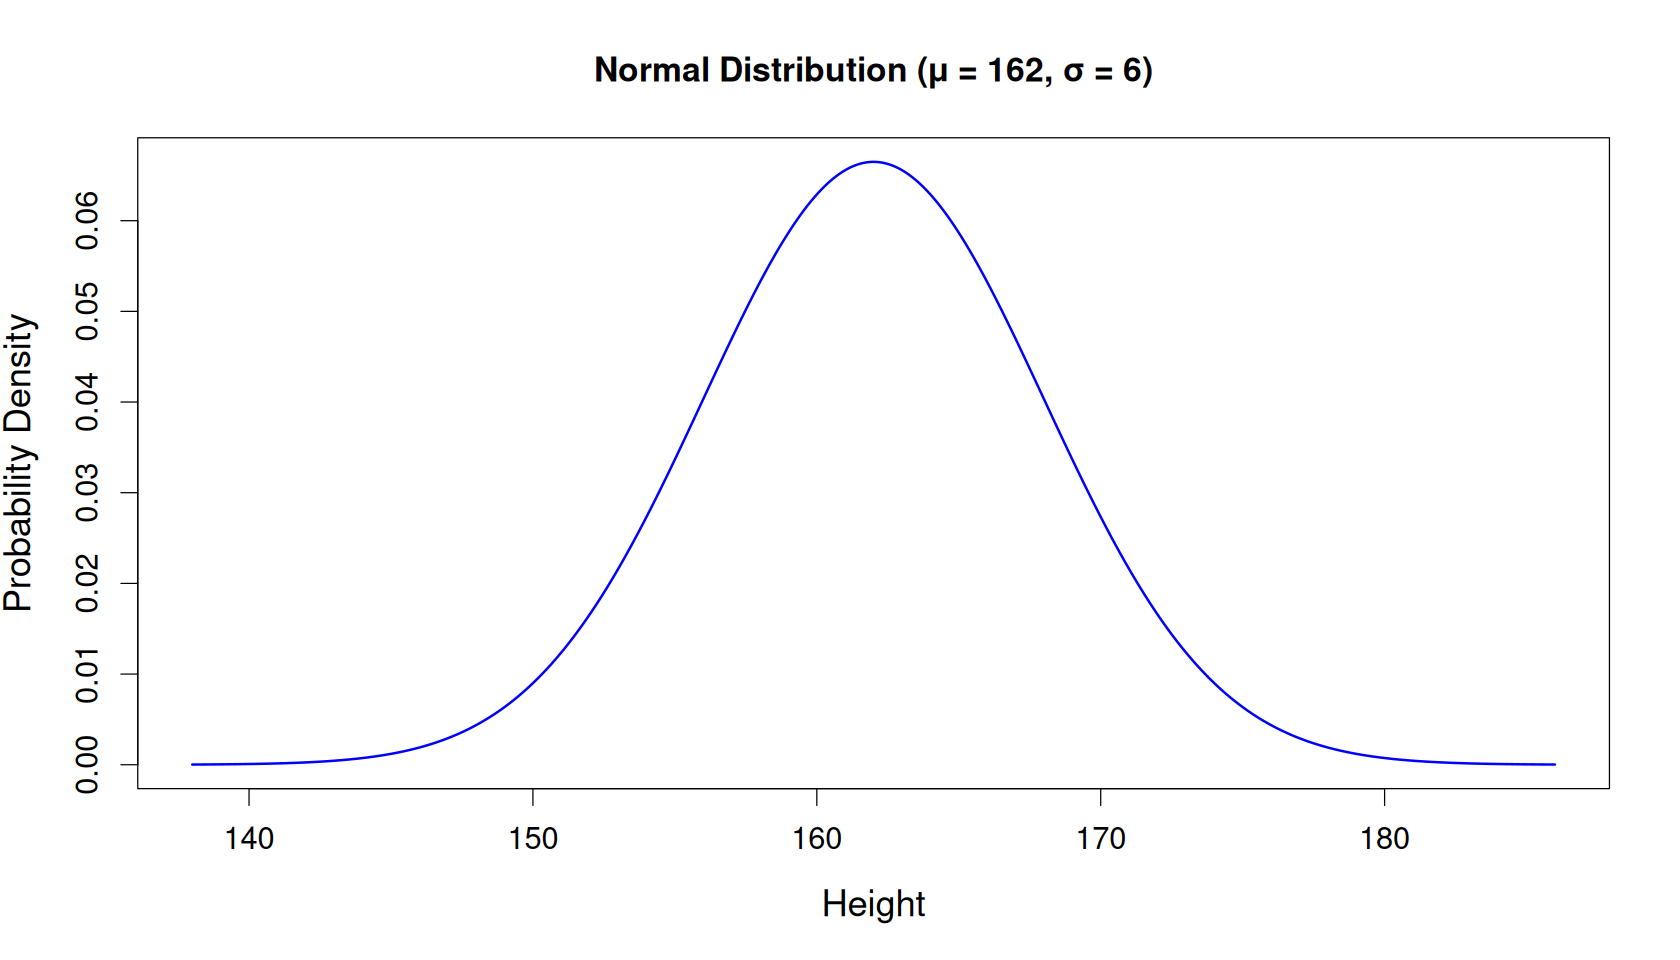

In [5]:
# Normal parameters
mean <- 162
sd   <- sqrt(36)

# Generate x values (+/- 4 SDs from the mean)
x <- seq(mean-4*sd, mean+4*sd, length=1000)

# Calculate the normal density
y <- dnorm(x, mean=mean, sd=sd)

# Plot
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x, y, type = "l", lwd = 2, col = "blue",
     main = paste0("Normal Distribution (μ = ", mean, ", σ = ", sd, ")"),
     xlab = "Height", ylab = "Probability Density")

Like the example earlier, it is unlikely that, as an experimental psychologist, you would spend much time measuring people's *height*. However, thinking more generally, you might end up measuring *reaction time*, scores from a *visual analogue scale*, *IQ*, metrics derived from *eye-tracking* or *time spent* attending to a visual stimulus. These are all examples of measures that can, in theory, take an infinite number of values within a given range and thus are all examples of continuous random variables. 

Although the normal distribution is used most frequently, other examples of continuous probability distributions include the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution), [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) and the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution).

`````{admonition} Key Concept
:class: tip
When we conduct an experiment, we concptualise the variables that we are measuring as *random variables*. This means that their values will change with each measurement and are governed by some random process. In this context, *random* means that their behaviour adheres to some probability distribution. As such, the variance in our measurements contains a known structure in terms of the underlying probability distribution. Our experiment is then conceptualised as the process of making random draws from that distribution. The shape of the distribution is governed by a number of *parameters*, which are conceptualised as *fixed constants* of the population we are drawing samples from. Our aim, very generally, is to use the information in the sample to estimate those population parameter values. This is how a statistical model attempts to explain the seemingly random variations in real-world measurements.
`````

## Properties of Probability Distributions
Beyond understanding the concepts of random variables and probability distributions, there are a number of properties of distributions that are worth understanding before we go further. 

### The Expected Value
All distributions have a property known as the *expected value*. Informally, this is equivalent to the *mean* of the distribution and thus it tells us the value that we *expect*, on average. More formally, the expected value is a form of *weighted-average*, but its precise mathematical definition is not really important for our purposes. For instance, if we have a random variable $y$ that adheres to

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right),
$$

then its expected value is

$$
E\left(y\right) = \mu.
$$

As such, our *prediction* for any realisation of $y$ would be equal to the mean of the distribution. This is an obvious example because the normal distribution has an expected value that is equal to one of its parameters. However, the principle is applicable to *any* distribution, whether its mean is coded directly by one of the parameters or not. For instance, if we had

$$
y \sim \mathcal{B}\left(n,p\right)
$$

then the expected value of $y$ becomes

$$
E\left(y\right) = np.
$$

How this result is reached is not especially important for us, but just note that it works by looking at the Binomial distribution we visualised earlier. 

`````{admonition} Equations for the Expected Value
:class: tip
If you are ever curious, the [Wikipedia pages](https://en.wikipedia.org/wiki/Probability_distribution) for all the most common probability distributions contain tables giving the formulas for their various properties, including the mean. For some distributions, the mean is the same as one of the parameters (e.g. the normal distribution, the Poisson distribution), whereas for others the mean is some function of the parameters (e.g. the binomial distribution, the uniform distribution).
`````

#### Why is the Expected Value Important?

The importance of the expected value is that it is not subject to random variation. It is the element of the distribution that does not change across measurements and thus represents some *universal truth* of the variable in question. In essence, the expected value is the *predictable* part of the variable. Because of this, we can conceptualise any value we measure as the expected value plus some random variation.

$$
y = E\left(y\right) + \epsilon
$$

where 

$$
\epsilon = y - E\left(y\right),
$$

in other words, this is the *error*, conceptualised as the difference between the value we expected and the actual data. We will see how this is used in the context of statistical models shortly. For now, just be aware that statistical models attempt to capture the expect value of the variable in question, meaning that the expected value is effectively our primary focus when it comes to building a statistical model.

To see this more clearly, take the distribution

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

with $\mu = 2$ and $\sigma^{2} = 1$. Imagine that we then sampled a value of 5. We can think of this as being the mean plus some random variation

$$
y_{1} = \mu + \epsilon_{1} = 2 + 3 = 5.
$$

Imagine that we then sampled a value of 0.5. We can think of this as

$$
y_{2} = \mu + \epsilon_{2} = 2 + -1.5 = 0.5.
$$

So notice that there is an element that is *constant* across measurements and an element that *changes* with each measurement. In this way, every single data value *contains* the expected value of the distribution. This is a *constant* that is true across all the data. As such, it is the random element $\epsilon$ that has probabilistic behaviour. If we remove the expected value, all we do in centre the data around 0, but we do not remove any of the randomness. We can see this below for `mpg`.

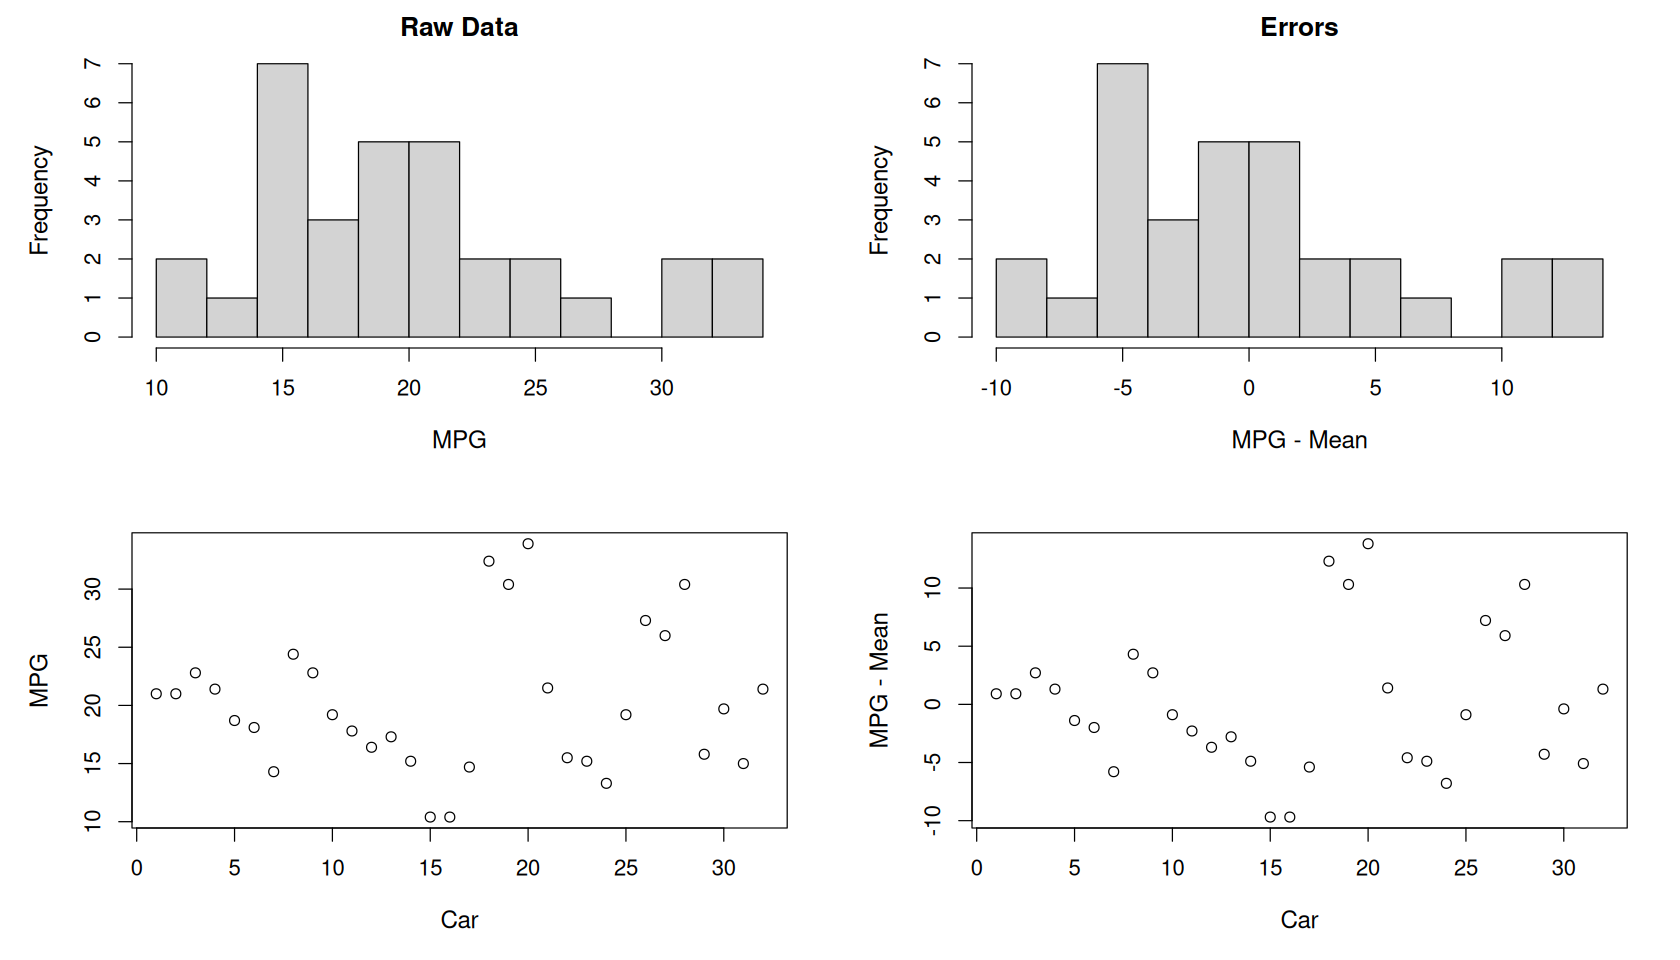

In [6]:
par(mfrow=c(2,2), mar=c(5, 5, 2, 2))
par(cex.lab=1.1, cex.axis=1, cex=1.1) # plot scaling

hist(mtcars$mpg,                    breaks=10, xlab="MPG",        main="Raw Data")
hist(mtcars$mpg - mean(mtcars$mpg), breaks=10, xlab="MPG - Mean", main="Errors")

plot(seq(1,length(mtcars$mpg)), mtcars$mpg,                  xlab="Car", ylab="MPG",        main="")
plot(seq(1,length(mtcars$mpg)), mtcars$mpg-mean(mtcars$mpg), xlab="Car", ylab="MPG - Mean", main="")

Because the expected value is a constant across all the data, we can also express the probability model

$$
y_{i} \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

as

$$
\begin{align*}
y_{i} &= \mu + \epsilon_{i} \\
\epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align*}
$$

From this perspective, variation in $y$ can be broken into two sources. The first is the expected value, which influences the *scaling* of $y$ and is *constant* across all the values. The second is the *error*, which influences the degree to which the data deviates from the expected value. Because the expected value is constant, the randomness in the data comes from the *errors*. Thus, it is the *errors* that have a probability distribution. The expected values influence how *predictable* the data are and the errors influence how *unpredictable* the data are. In terms of statistical modelling, it is the *predictable* element we wish to capture as a universal truth of the variable in question.

### The Variance
... All distributions have some metric of their variance, even if there is not a parameter that directly controls it (such as the normal distribution). For instance, the binomial distribution has a variance equal to $np(1-p)$. ... Formally, this is known as the *second moment* of a distribution.

`````{admonition} Moments of Distributions
:class: tip
The *expected value* and the *variance* are both examples of the *moments* of a probability distribution...
`````

## Manipulating Random Variables
... It is important to recognise that when a random variable is manipulated in some way, the fact that it is random does not change. However, the specific distribution *will* change. ... A lot of effort within classical statistics has been dedicated to manipulating random variables and then trying to figure out what distribution the manipulated value has.

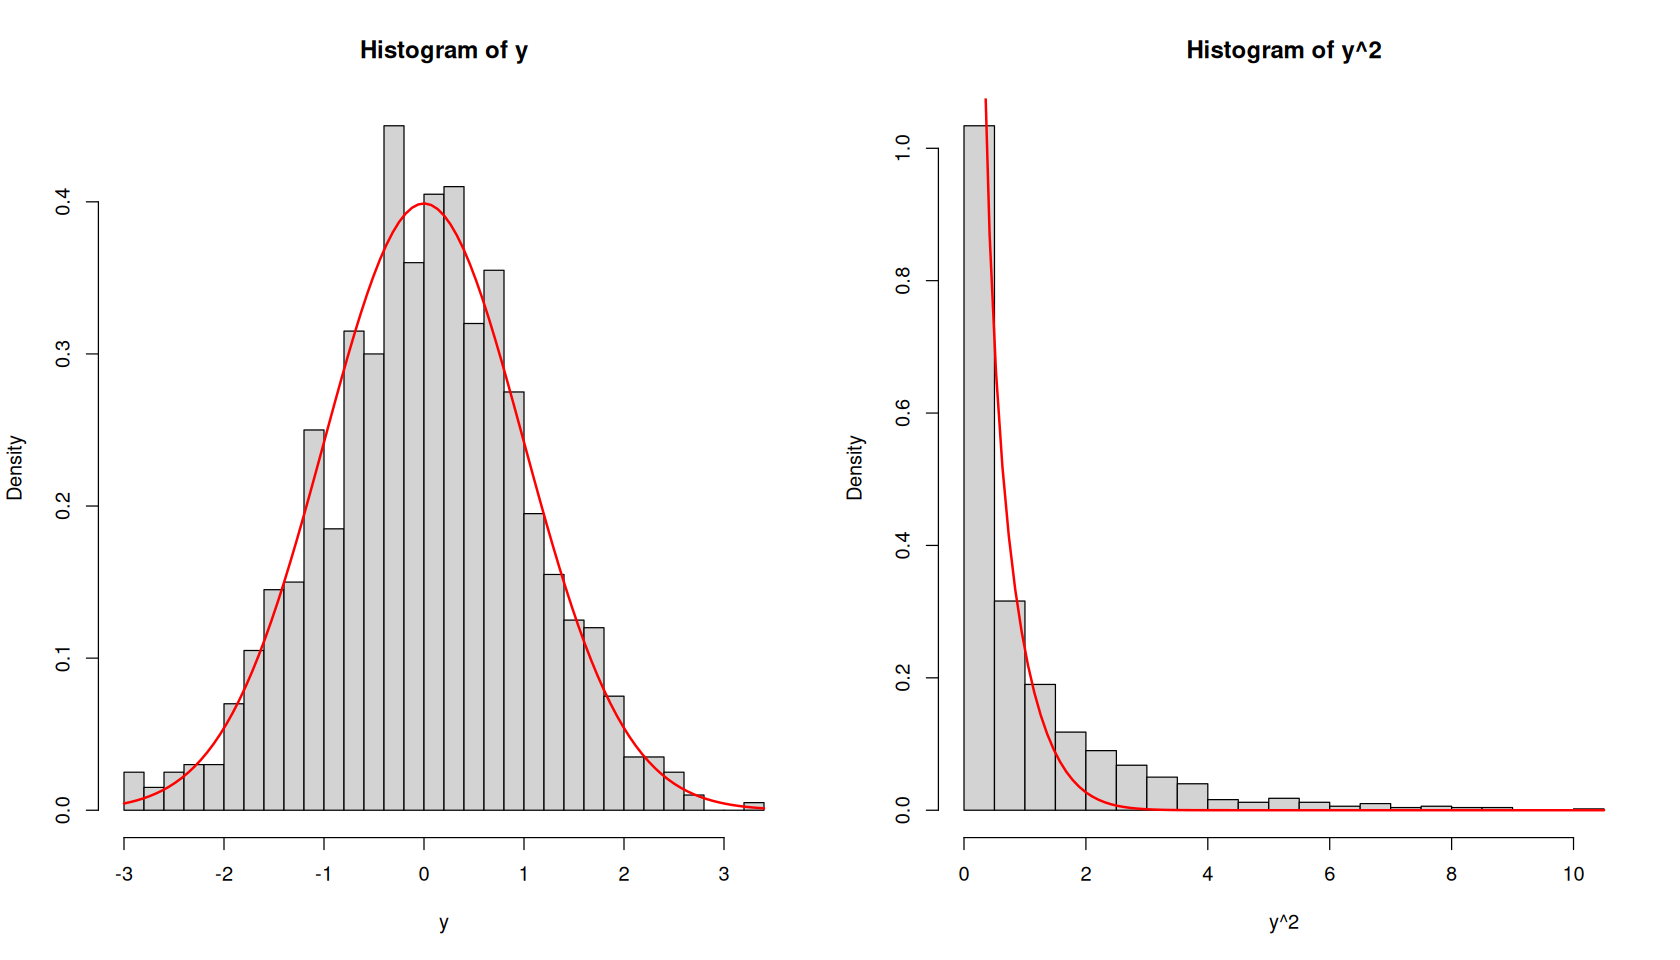

In [20]:
y <- rnorm(n=1000, mean=0, sd=1)

par(mfrow=c(1,2))
hist(y, probability=TRUE, breaks=30)
curve(dnorm(x, mean=0, sd=1),
      col="red", lwd=2, add=TRUE)

hist(y^2, probability=TRUE, breaks=30)
curve(dchisq(x^2, df=1),
      col="red", lwd=2, add=TRUE)


`````{topic} Section Summary
In this section, we have explored the general framework under which the vast majority of analyses in this course will be based.
`````

[^probexp]: Note that an "experiment" in the context of probability theory has a much broader definition than we would typically use in science.

[^rnorm]: Note that the `rnorm` function parameterises the normal distribution using the *standard deviation*, rather than the *variance.*